<img src="kntu-logo.png">

# Digital Image Processing
## First Computer Assignment
### Amirhosein Najafi (I)
### Student ID : 40112894
### Professor : Dr. Abrishami (II)

#### I : a.najafi@email.kntu.ac.ir
#### II : moghadam@eetd.kntu.ac.ir

## Part 1 - 2D Wavelet Subband Coding

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import pywt.data
from scipy.signal import convolve2d

#### a ) Reading  Images

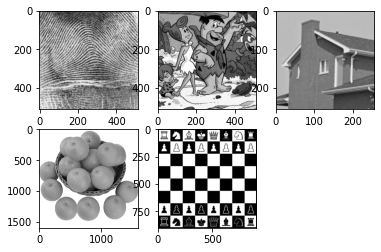

In [2]:
image1 = cv2.imread(r"fingerprint.png")
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = cv2.imread(r"flinstones.png")
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image3 = cv2.imread(r"house.png")
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

image4 = cv2.imread(r"Oranges.jpg")
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

image5 = cv2.imread(r"Chessboard.jpg")
gray5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)


plt.subplot(2,3,1)
plt.imshow(gray1, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,3,2)
plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,3,3)
plt.imshow(gray3, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,3,4)
plt.imshow(gray4, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,3,5)
plt.imshow(gray5, cmap='gray', vmin=0, vmax=255)



<hr>

#### b ) Plot the low/high decomposition and reconstruction filters for Daubechies 8-tap

In [3]:
for family in pywt.families():
    print("Family: " + family + ", " .join(pywt.wavelist(family)))

Family: haarhaar
Family: dbdb1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
Family: symsym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
Family: coifcoif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
Family: biorbior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
Family: rbiorbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
Family: dmeydmey
Family: gausgaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
Family: mexhmexh
Family: morlmorl
Family: cgaucgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, cgau8
Famil

In [251]:
wavelet = pywt.Wavelet('db4')
dec_lo, dec_hi = np.array(wavelet.dec_lo), np.array(wavelet.dec_hi)
rec_lo, rec_hi = np.array(wavelet.rec_lo) , np.array(wavelet.rec_hi)

Text(0.5, 1.0, 'HP Rec Filter')

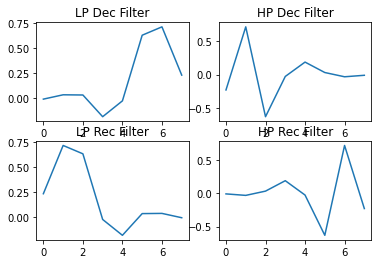

In [252]:
figure, axis = plt.subplots(2, 2) 
  
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])

axis[0, 0].plot(x, dec_lo) 
axis[0, 0].set_title("LP Dec Filter") 

axis[0, 1].plot(x, dec_hi) 
axis[0, 1].set_title("HP Dec Filter") 
  
    
axis[1, 0].plot(x, rec_lo) 
axis[1, 0].set_title("LP Rec Filter") 
  
axis[1, 1].plot(x, rec_hi) 
axis[1, 1].set_title("HP Rec Filter") 

In [253]:
def scale_images(image):
#     return image
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return normalized_image

In [254]:
arr = np.array([[1,1,1,1],[1,2,2,1],[1,2,2,1],[1,1,1,1]])

<hr>

#### c ) Implement a 2D wavelet and inverse 2D wavelet transforms

In [255]:
def wt2d(x2d, LoD, HiD, nlevels = 1):
    coeffs = [x2d]

    row, col = x2d.shape
    
    result = np.zeros((row, col), dtype=float)

    for l in range(nlevels):
        
        # Row Convolution and Down Sampling
        row_high = convolve2d(coeffs[-1], HiD.reshape((1, HiD.shape[0])), mode='same')[:, 1::2]
        row_low = convolve2d(coeffs[-1], LoD.reshape((1, HiD.shape[0])), mode='same')[:, 1::2]
        
        # Column Convolution and Down Sampling
        column_high_high = convolve2d(row_high, HiD.reshape((LoD.shape[0],1)), mode='same')[1::2, :]
        column_high_low = convolve2d(row_high, LoD.reshape((LoD.shape[0],1)), mode='same')[1::2, :]
        column_low_high = convolve2d(row_low, HiD.reshape((LoD.shape[0],1)), mode='same')[1::2, :]
        column_low_low = convolve2d(row_low, LoD.reshape((LoD.shape[0],1)), mode='same')[1::2, :]
          
        coeffs[-1] = scale_images(column_high_high)
        coeffs.append(scale_images(column_high_low))
        coeffs.append(scale_images(column_low_high))
        coeffs.append(scale_images(column_low_low))
                
        row = int(row / 2)
        
        result[0:row , 0:row] = scale_images(column_low_low)
        result[row:2 * row , 0:row] = column_low_high
        result[0:row , row: 2 * row] = column_high_low
        result[row:2 * row , row:2 * row] = column_high_high
                
    return coeffs, result

In [268]:
nlevel = 2
DWT, DecImg = wt2d(gray2, dec_lo, dec_hi, nlevel)

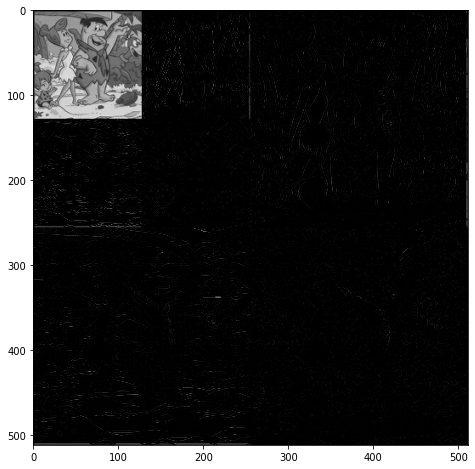

In [269]:
plt.figure(figsize=(10, 8))  # Set the desired width and height


plt.subplot(1,1,1)
plt.imshow(DecImg, cmap='gray', vmin=0, vmax=255)

In [270]:
def upsample(image,ax):
    num_rows, num_cols = image.shape
    if ax == "row":
        output_array = np.zeros((2 * num_rows, num_cols))
        output_array[::2, :] = image
    else:
        output_array = np.zeros((num_rows, 2 * num_cols))
        output_array[:, ::2] = image
    return output_array


In [271]:
def iwt2d(y2d, LoD, HiD, nlevels = 1):
    
    row, col = y2d.shape
    row = int(row / (2 ** nlevels))
    
    output_array_r = np.zeros((2 * row, col))
    output_array_c = np.zeros((row, 2 * col))
    
    current_coeffs = [None, None, None, None]
    
    for l in range(nlevels):
        
        # Get Current Coeffs
        current_coeffs[0] = y2d[0:row , 0:row]
        current_coeffs[1] = y2d[0:row , row: 2 * row]
        current_coeffs[2] = y2d[row:2 * row , 0:row]
        current_coeffs[3] = y2d[row:2 * row , row:2 * row]
        
        # Up Sampleing

        current_coeffs[0] = upsample(current_coeffs[0],"row")
        current_coeffs[1] = upsample(current_coeffs[1],"row")
        current_coeffs[2] = upsample(current_coeffs[2],"row")
        current_coeffs[3] = upsample(current_coeffs[3],"row")
                
        # Convoloution Columns
        column_high_high = convolve2d(current_coeffs[3], HiD.reshape((LoD.shape[0],1)), mode='same')
        column_high_low = convolve2d(current_coeffs[1], LoD.reshape((LoD.shape[0],1)), mode='same')
        column_low_high = convolve2d(current_coeffs[2], HiD.reshape((LoD.shape[0],1)), mode='same')
        column_low_low = convolve2d(current_coeffs[0], LoD.reshape((LoD.shape[0],1)), mode='same')
        
        # Summation
        row_high = column_high_high + column_high_low
        row_low = column_low_high + column_low_low
        
        # Up Sampleing
        row_high = upsample(row_high,"col")
        row_low = upsample(row_low,"col")
        
        # Convoloution Rows
        row_high = convolve2d(row_high, HiD.reshape((1,LoD.shape[0])), mode='same')
        row_low = convolve2d(row_low, LoD.reshape((1,LoD.shape[0])), mode='same')

        row = row * 2
        
        y2d[0:row, 0:row] = row_high + row_low
        
    return(y2d)
        
        
        

In [272]:
RecImg = iwt2d(DecImg.copy(), rec_lo, rec_hi, nlevel)

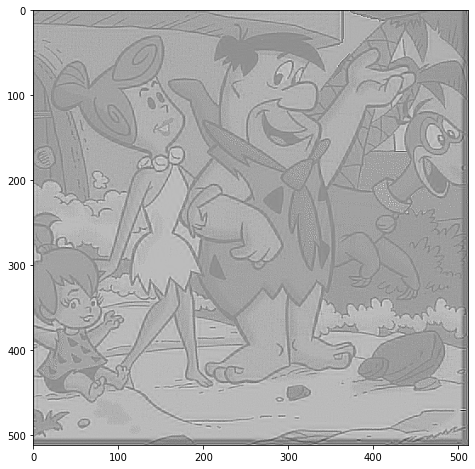

In [273]:
plt.figure(figsize=(10, 8))  # Set the desired width and height


plt.subplot(1,1,1)
plt.imshow(RecImg, cmap='gray')

In [274]:
mae = np.mean(np.abs(gray2 - RecImg))
print(f"Mean Absolute Error (MAE) between the two images: {mae:.2f}")

Mean Absolute Error (MAE) between the two images: 104.25


<hr>

#### d- Decompose and reconstruct the image using the approximation coefficients only

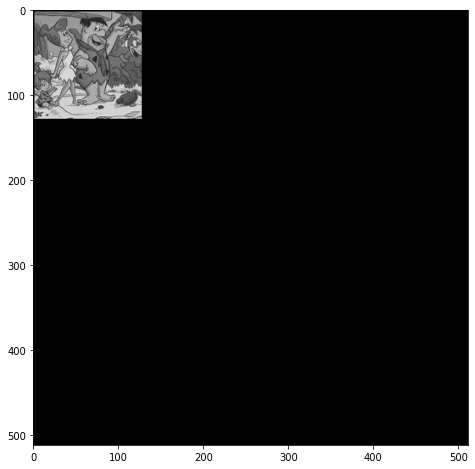

In [275]:
image = np.zeros_like(RecImg, dtype=float)
r = int(DecImg.shape[0] / (2 ** nlevel))
image[0:r , 0:r] = DecImg[0:r , 0:r]

plt.figure(figsize=(10, 8))  # Set the desired width and height
plt.subplot(1,1,1)
plt.imshow(image, cmap='gray')

In [276]:
RecImg2 = iwt2d(image.copy(), rec_lo, rec_hi, nlevel)

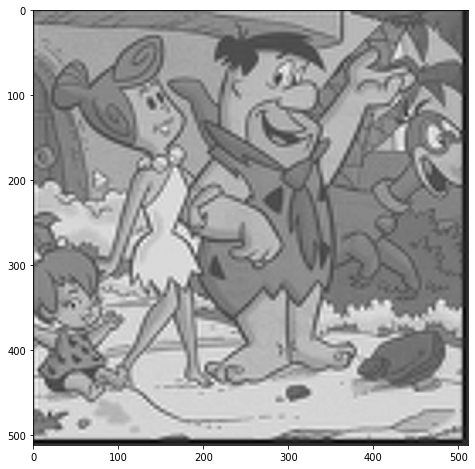

In [277]:
plt.figure(figsize=(10, 8))  # Set the desired width and height


plt.subplot(1,1,1)
plt.imshow(RecImg2, cmap='gray')

In [278]:
mae2 = np.mean(np.abs(gray2 - RecImg2))
print(f"Mean Absolute Error (MAE) between the two images: {mae2:.2f}")

Mean Absolute Error (MAE) between the two images: 104.83


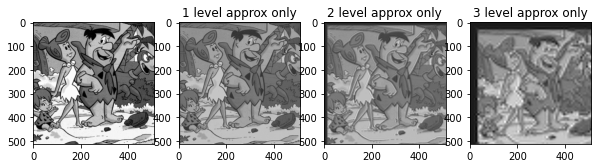

In [267]:
plt.figure(figsize=(10, 8))  # Set the desired width and height

plt.subplot(1,4,1)
plt.imshow(gray2, cmap='gray')

for i in range(1,4):
    DWT, DI = wt2d(gray2, dec_lo, dec_hi, i)
    
    img = np.zeros_like(DI, dtype=float)
    r = int(DI.shape[0] / (2 ** i))
    img[0:r , 0:r] = DI[0:r , 0:r]
    
    RI = iwt2d(img.copy(), dec_lo, dec_hi, i)
    
    plt.subplot(1,4,i + 1)
    plt.title(f"{i} level approx only")
    plt.imshow(RI, cmap='gray')
    